<a href="https://colab.research.google.com/github/ronnieogwang/Deep_learning_for_CV/blob/master/code/chapter_20/pretrained_vgg16_cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#resinet

In [0]:
import tensorflow as tf
from tensorflow import keras 

In [0]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input, Dropout, add, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical,plot_model
from matplotlib import pyplot

In [4]:
#load dataset
(X_train, y_train),(X_test,(y_test)) = cifar10.load_data()
#summarize data
print("train X= %s and y=%s" % (X_train.shape, y_train.shape))
print("test X= %s and y=%s" % (X_test.shape, y_test.shape))


train X= (50000, 32, 32, 3) and y=(50000, 1)
test X= (10000, 32, 32, 3) and y=(10000, 1)


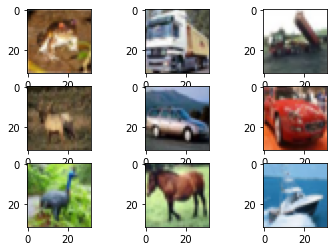

In [5]:
#plot images
for i in range(9):
  pyplot.subplot(331+i)
  pyplot.imshow(X_train[i])
pyplot.show()


In [0]:
#preprocess images
#Normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255.0
X_test = X_test/255.0

#categorical data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [7]:
y_train.shape

(50000, 10)

In [0]:
#define model
#load model without classifier layers
model = VGG16(include_top=False, input_shape =(32,32,3))
#add classifier layers
flat1= Flatten()(model.output)
dense1 = Dense(1024, activation= 'relu', kernel_initializer='he_uniform')(flat1)
dense2 = Dense(10, activation='softmax')(dense1)
model = Model(inputs = model.inputs, outputs=dense2)
opt = SGD(lr=0.01, momentum = 0.9)
model.compile(optimizer = opt, loss= 'categorical_crossentropy', metrics = ['accuracy'])





In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

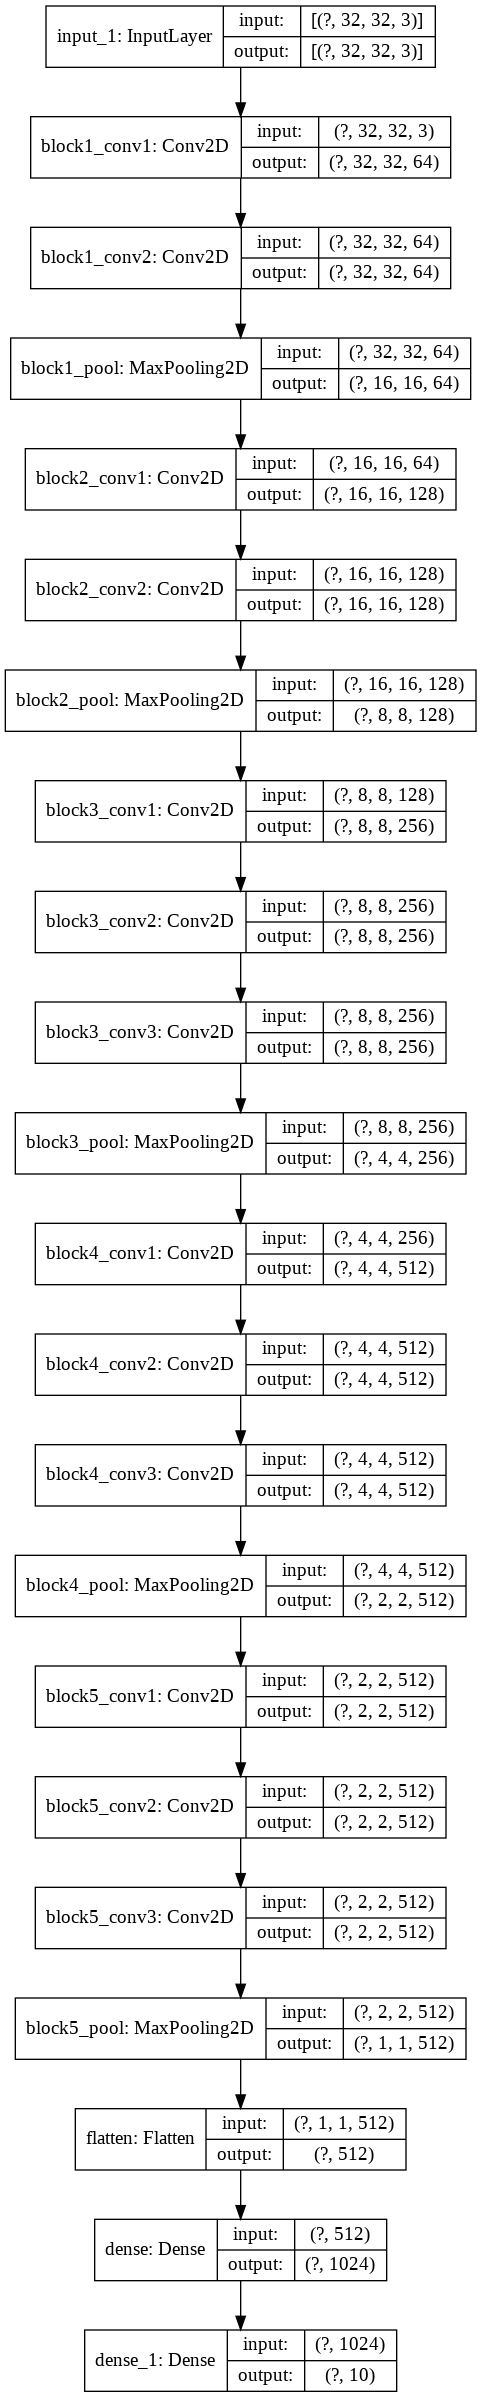

In [10]:
plot_model(model, show_shapes=True)

In [11]:
datagen = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1, horizontal_flip=True, rotation_range=25)

iterator = datagen.flow(X_train, y_train, batch_size=64)

steps = int(X_train.shape[0] / 64)

history = model.fit_generator(iterator, steps_per_epoch = steps, epochs =20,validation_data = (X_test, y_test), verbose= 1 )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
781/781 [==============================] - 31s 40ms/step - loss: 1.2164 - accuracy: 0.5713 - val_loss: 0.8113 - val_accuracy: 0.7274
Epoch 2/20
781/781 [==============================] - 31s 40ms/step - loss: 0.7820 - accuracy: 0.7337 - val_loss: 0.7376 - val_accuracy: 0.7573
Epoch 3/20
781/781 [==============================] - 31s 40ms/step - loss: 0.6597 - accuracy: 0.7747 - val_loss: 0.5553 - val_accuracy: 0.8110
Epoch 4/20
781/781 [==============================] - 31s 40ms/step - loss: 0.5784 - accuracy: 0.8044 - val_loss: 0.4850 - val_accuracy: 0.8388
Epoch 5/20
781/781 [==============================] - 31s 40ms/step - loss: 0.5192 - accuracy: 0.8219 - val_loss: 0.4519 - val_accuracy: 0.8447
Epoch 6/20
781/781 [==============================] - 31s 40ms/step - loss: 0.4741 - accuracy: 0.8387 - val_loss: 0.5167 - val_accuracy: 0.8354
Epoch 7/20
781/781 [==============================] - 31s 40

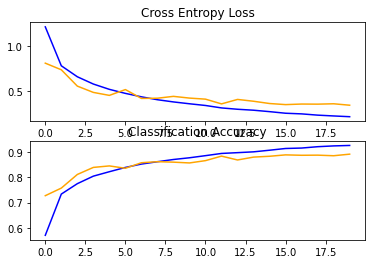

In [12]:
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

In [0]:
_,acc = model.evaluate(X_test,y_test, verbose = 0)

In [14]:
print('accuracy is: %.3f'%(acc*100.0))

accuracy is: 89.100
